<tr>
<td align="left">
 <div align="left" style="margin-left: 80px;" >
   <font color="#21618C" size=10px >
   <b>Lets Grow More</b>
 <div align="left" style="margin-left: -20px;">       
   <font color="#21618C" size=6px>
   <b>Virtual Internship Program</b>
<td width="30%" align="left" > <img src="LGM logo.jpg"> 

<table align="left" style="margin-left: 80px;">
<td>
<font color="green" size=6px >            
<b>Data Analytics Internship</b>

## **Author:** Roshankumar S

## Prediction using Decision Tree Algorithm
* ##### [1. Decision Tree Algorithm](#Decision_Tree)
* ##### [2. Problem Statement](#problem_statement)
* ##### [3. Objective](#objective)
* ##### [4. Dataset Description](#description)
* ##### [5. Data Dictionary](#dictionary)
* ##### [6. Prerequisite](#prerequisite)
* ##### [7. Understanding and summarizing dataset](#understanding)
* ##### [8. Data Visualization](#visualization)
* ##### [9. Data preparation](#preparation)
* ##### [10. Model Developement](#train_model)
* ##### [11. Model Evaluation](#evaluation)
* ##### [12. Actual v/s Predicted](#comparison)
* ##### [13. Conclusion](#conclusion)

<a id="Decision_Tree"><a>
## Decision Tree Algorithm

<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
The decision tree algorithm is a popular and intuitive machine learning algorithm used for both classification and regression tasks. It builds a tree-like model by recursively splitting the dataset based on the most informative features. Each split creates branches or child nodes that represent different paths in the decision-making process. At each leaf node, a prediction or decision is made based on the majority class (classification) or the average value (regression) of the target variable. Decision trees are easy to understand and interpret, allowing insights into the decision-making process. However, they can suffer from overfitting if not properly pruned or constrained.
<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
Decision trees excel at handling both categorical and numerical features, capturing complex interactions and non-linear relationships in the data. They provide transparency and interpretability, allowing users to trace the logic behind predictions. Decision trees can be applied to various domains, including finance, healthcare, and marketing, for tasks such as customer segmentation, credit risk assessment, and disease diagnosis. To enhance the performance of decision trees and mitigate overfitting, techniques like pruning, setting constraints, or employing ensemble methods such as random forests can be used. These methods leverage multiple decision trees to make collective predictions and improve generalization on unseen data.

<a id="problem_statement"><a>
## Problem Statement

<p style='text-align: justify; max-width:950px;'>
Develop a decision tree model using the Iris dataset to accurately classify different species of flowers based on their petal length, petal width, sepal length, and sepal width. The model should generalize well, avoid overfitting, and achieve high classification accuracy on unseen flower samples.

<a id="objective"><a>
## Objective

* Create a decision tree model that effectively differentiates between the three species of Iris flowers (setosa, versicolor, and virginica) based on their petal length, petal width, sepal length, and sepal width.

* Ensure that the decision tree model can generalize well to new, unseen flower samples and avoid overfitting by capturing the underlying patterns and relationships among the features.

* Evaluate the performance of the decision tree model using appropriate metrics such as accuracy, precision, recall, and F1-score to assess its classification performance.

<a id="description"><a>
## Dataset Description

<p style='text-align: justify; max-width:950px;'>
The Iris flower dataset is a widely used dataset in data science and contains information on three different species of Iris flowers: Setosa, Versicolor, and Virginica. The dataset consists of 150 instances, with 50 instances for each species.
The features included in the dataset are Sepal length , Sepal width , Petal length , Petal width.
Species is the target variable, which indicates the species of the Iris flower (Setosa, Versicolor, or Virginica). Each instance in the dataset represents a single Iris flower, and the four features provide information on the dimensions of the flower's sepal and petal.

<a id="dictionary"><a>
## Data Dictionary

**SepalLength** : Sepal length of the Iris flower in centimeters 

**SepalWidth** : Sepal width of the Iris flower in centimeters 
 
**PetalLength** : Petal length of the Iris flower in centimeters 
 
**PetalWidth** : Petal width of the Iris flower in centimeters 

**Species** : Species of the Iris flower 

<a id="prerequisite"><a>
## Prerequisite

### Import libraries

In [1]:
# Import numpy to perform mathematical operations on the dataset
import numpy as np
# Import pandas for storing , retrieving and manipulating 2-dimensional data in the form of table
import pandas as pd
# Import matplotlib for visualization tools
import matplotlib.pyplot as plt
# Import seaborn for better visualization methods
import seaborn as sns

# Import Decision Tree for model developement
from sklearn.tree import DecisionTreeClassifier
# Import metrics to evaluate model
from sklearn import metrics
# Import tree to perform functions in decision tree
from sklearn import tree

# Import warnings
import warnings
# Ignore warnings during code execution
warnings.filterwarnings('ignore')

%pylab inline 
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Import dataset 

In [2]:
# Import the iris dataset from seaborn to a dataframe
iris = sns.load_dataset("Iris")

# Create a copy of data for performing manipulations
data = iris.copy()

<a id="understanding"><a>
## Understanding and summarizing dataset

In [3]:
# Check the length of the dataset
len(data)

150

In [4]:
# Display top 5 observations of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Get basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Get statistical data of the dataset which includes 5-point summary 
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Check if null values are present in the dataset
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<a id="visualization"><a>
## Data Visualization 

### Heat Map of correlation

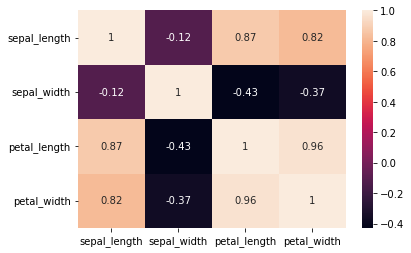

In [8]:
# Plot a heat map of iris dataset with annotations
sns.heatmap(data.corr(),annot=True)
# Display the plot
plt.show()

### Pair wise plot

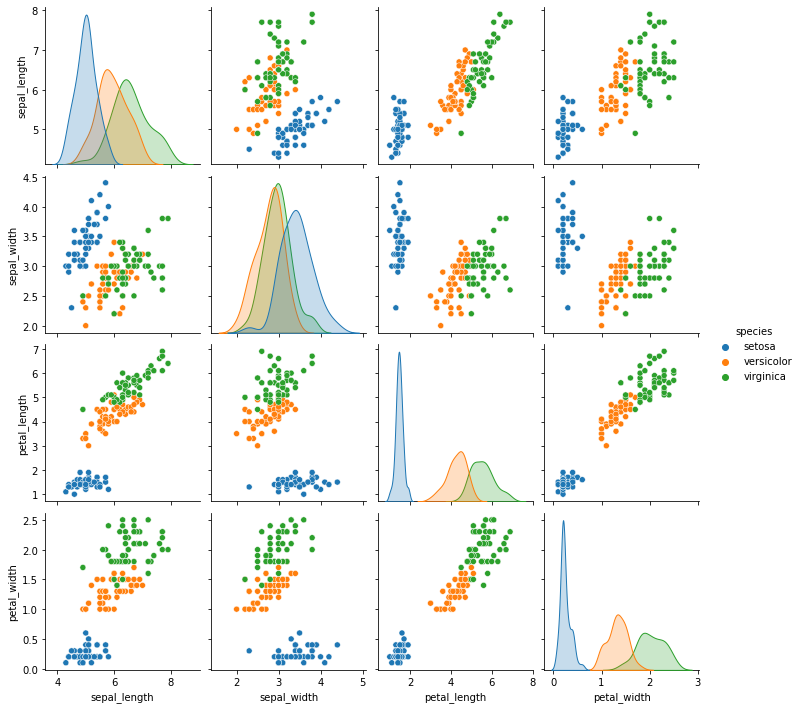

In [9]:
# Plot a pair wise scatter plot for each combination of attributes with hue as species 
sns.pairplot(data=data,hue="species")
# Display the plot
plt.show()

<a id="preparation"><a>
## Data Preparation

In [10]:
# Convert categorical column into numerical column using label encoding
data["species"] = data["species"].map({"setosa":0,"virginica":1,"versicolor":2})

# Display top 5 observations
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Extract independent values
X = data.iloc[:,:-1].values

# Extract target values
y = data.iloc[:,-1]

<a id="train_model"><a>
## Model Developement

In [12]:
# Create a model using Decision Tree Classifier 
model = DecisionTreeClassifier(criterion="entropy",max_depth=3)

# Train the model using data
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Visualize Decision Tree Classifier

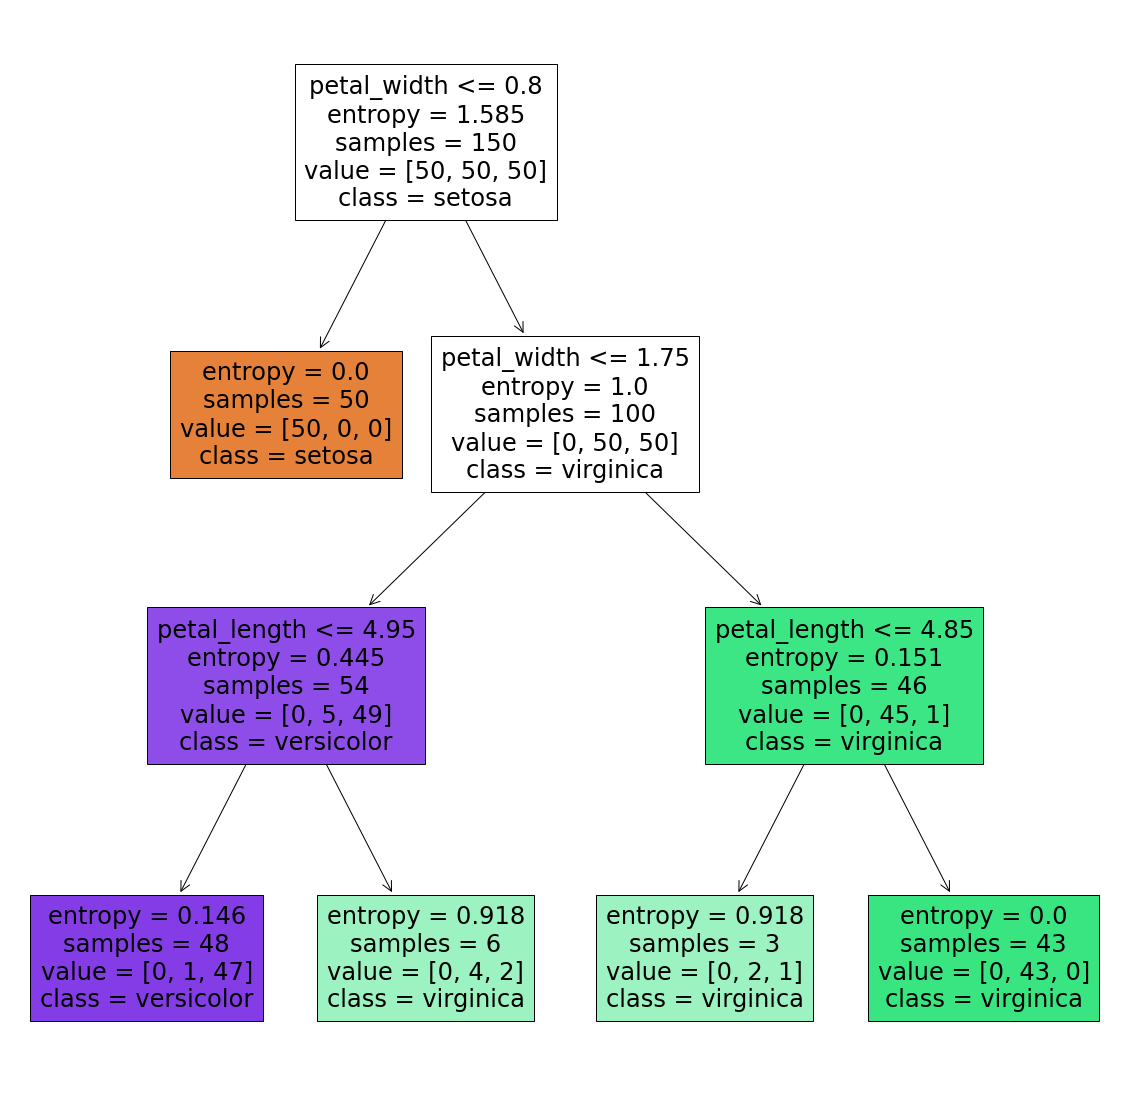

In [14]:
# Adjust plot size for better visualization
plt.figure(figsize=(20,20))

# Display a plot to visualize root nodes and leaf nodes
tree.plot_tree(model, feature_names=data.columns[:-1], class_names=["setosa","virginica","versicolor"], filled=True)

# Display the plot
plt.show()

<a id="evaluation"><a>
## Model Evaluation

In [15]:
# Display performance score of the model
model.score(X,y)

0.9733333333333334

In [16]:
# Store expected target values
expected = y

# Store predicted target values
predicted = model.predict(X)

In [17]:
# Display metrics of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.98      0.96        50
           2       0.98      0.94      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [18]:
# Display confusion matrix
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 49  1]
 [ 0  3 47]]


<a id="comparison"><a>
## Actual v/s Predicted

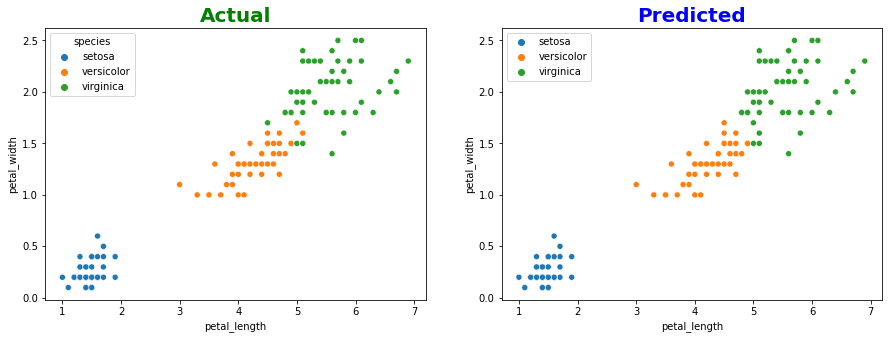

In [20]:
# Adjust plot size for better visualization
plt.figure(figsize=(15,5))

# Create a subplot and plot actual values
plt.subplot(121)
plt.title("Actual",fontsize= 20,fontweight= "bold",color="Green")
sns.scatterplot(x=data.petal_length,y=data.petal_width,hue=iris.species)

# Create a subplot and plot predicted values
plt.subplot(122)
plt.title("Predicted",fontsize= 20,fontweight= "bold",color="Blue")
sns.scatterplot(x=data.petal_length,y=data.petal_width,hue=np.where(predicted==0,"setosa",np.where(predicted==1,"virginica","versicolor")))

# Display the plot
plt.show()

<a id="conclusion"><a>
## Conclusion

<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
In conclusion, we have successfully developed a decision tree model using the Iris dataset to predict the species of flowers based on their petal length, petal width, sepal length, and sepal width. The decision tree algorithm proved to be an effective tool for this classification task.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
Through the implementation of the decision tree model, we were able to achieve a high accuracy rate in classifying the Iris flower species. The model demonstrated its ability to generalize well to unseen flower samples, indicating its potential for real-world applications.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
The interpretability of the decision tree algorithm allowed us to gain insights into the important features and decision rules that contribute to the classification process. We observed that the petal measurements played a crucial role in distinguishing between different species of Iris flowers.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
Overall, the decision tree algorithm provided a reliable and efficient solution for the prediction of Iris flower species. Further improvements could involve fine-tuning the model's hyperparameters or exploring ensemble techniques like random forests to enhance its performance.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
This project showcases the practicality and effectiveness of using decision tree algorithms in flower species classification tasks. The knowledge and insights gained from this project can be applied to various domains that involve similar classification problems, contributing to advancements in automated flower identification and plant taxonomy.